# Coursework
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers.

Please also:
- Make sure you use a python environment using the `requirements.txt` files provided by the course.
- Make sure your notebook executes without errors.
- Do not add and remove cells but rather provide your answers in the spaces given.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.
- Do not import any libraries other than modules from `sklearn`.
- Always label your plots.

**Please rename the notebook filename to include your student number in the filename.  And please also add your student number below:**

In [1]:
STUDENT_NUMBER = "23210403"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## AstroML

The data used is this coursework is obtained using [AstroML](http://www.astroml.org), a python package for machine learning for astronomy.  Although we take data from AstroML, this coursework is not based on standard AstroML examples.  So you will *not* find the solutions in AstroML examples!

## SDSS

The data obtained through AstroML was observed by the [Sloan Digital Sky Survey](https://www.sdss.org/) (SDSS), which began observations in 2000.  SDSS data have lead to many scientific advances and the experiment is widely seen as one of the most successful surveys in the history of astronomy.

---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [AstoML](http://www.astroml.org)
- [AstroPy](http://www.astropy.org/)

---

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

## Part 1: Regression

In these exercises we will consider the regression problem of the astonomical distance modulus vs redshift relationship.

In astronomy, the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) specifies the difference between the apparent and absolute magnitudes of an astronomnical object.  It provides a way of expressing astrophysical distances. 

Astronomical [redshift](https://en.wikipedia.org/wiki/Redshift) specifies the shift in wavelength that astronomical objects undergo due to the expansion of the Universe.  Due to Hubble's Law, more distance objects experience a greater redshift.


In [4]:
from astroML.datasets import generate_mu_z

In [5]:
# Load data
m = 150
z_sample, mu_sample, dmu = generate_mu_z(m, random_state=3)

*Plot the distance modulus ($\mu$) vs redhift ($z$), including error bars.*

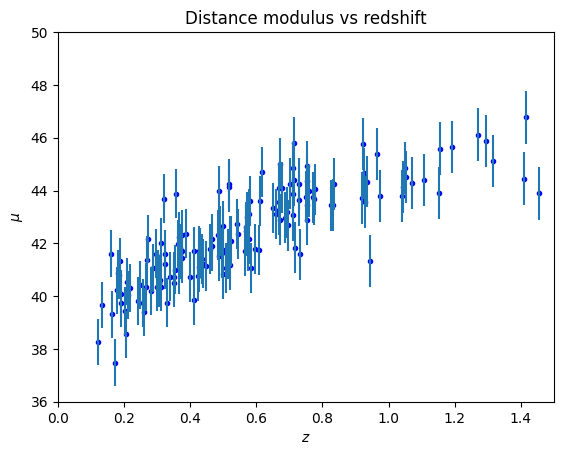

In [6]:
# Plot data
def plot_dist_mod():
    # YOUR CODE HERE
    plt.plot(z_sample, mu_sample, "b.")
    plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt="none")
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Distance modulus vs redshift')
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)
plot_dist_mod()

Recall the normal equations for linear regression follow by analytically minimising the cost function: 

$$\min_\theta\ C(\theta) = \min_\theta \ (X \theta - y)^{\rm T}(X \theta - y).$$

Show analytically that the solution is given by 

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

[Matrix calculus identities](https://en.wikipedia.org/wiki/Matrix_calculus) may be useful (note that we use the denominator layout convention).

*Expand the cost function and drop terms that do not depend on $\theta$ (use latex mathematics expressions):*

$$ \min_ \theta \ C(\theta) = \min_ \theta \ (X^{\rm T} X \theta^{2} - 2X^{\rm T}y\theta + y^{2}) $$
$$
\frac{d \ C(\theta)}{d \ \theta} = 2X^{\rm T} X \theta - 2X^{\rm T}y $$
$$

*Set the derivative to zero and solve for $\theta$ (use latex mathematics expressions):*

$$ \frac{d \ C(\theta)}{d \ \theta} = 0 $$
$$ 2X^{\rm T} X \theta - 2X^{\rm T}y = 0 $$
$$ X^{\rm T} X \theta = X^{\rm T}y $$
$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y $$

*Solve for $\theta$ by numerically implementing the analytic solution given above.*

In [7]:
def compute_theta_lin_reg(X, y):
    # YOUR CODE HERE
    X_b = np.c_[np.ones(X.size), X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

In [8]:
assert compute_theta_lin_reg(z_sample, mu_sample).shape == (2,)
theta = compute_theta_lin_reg(z_sample, mu_sample)
(theta_c, theta_m) = theta
print("Linear regression parameters recovered analytically: intercept={0:.4f}, slope={1:.4f}".format(theta_c, theta_m))

Linear regression parameters recovered analytically: intercept=39.5505, slope=4.9538


In [9]:
check_var_defined('theta_c')
check_var_defined('theta_m')

theta_c defined.
theta_m defined.


*Write a method to make a prediction for a given redshift.*

In [10]:
def predict_lin_reg(theta, x):
    # YOUR CODE HERE
    (theta_c, theta_m) = theta
    y = theta_m * x + theta_c
    return y

*Predict the distance modulus for a range of redshift values between 0.01 and 1.5 and plot the predicted curve overlayed on data (make a new plot; do not revise the plot above).  Call the variable used to store the predictions for your polynomial model `mu_pred_lin`.*

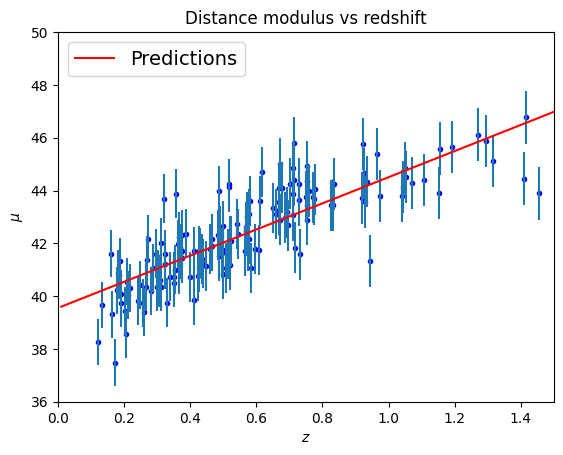

In [11]:
z = np.linspace(0.01, 1.5, 1000)
plot_dist_mod()
# YOUR CODE HERE
mu_pred_lin = predict_lin_reg(theta, z)
plt.plot(z, mu_pred_lin, "r-", label="Predictions")
plt.legend(loc="upper left", fontsize=14)

In [12]:
check_var_defined('mu_pred_lin')
assert mu_pred_lin.shape == (len(z),), "Make sure the shape of your predictions is correct"

mu_pred_lin defined.


*Solve for the parameters $\theta$ using Scikit-Learn.*

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# YOUR CODE HERE
lin_reg.fit(z_sample.reshape(-1, 1), mu_sample)

LinearRegression()

In [14]:
assert lin_reg.coef_.shape == (1,), "Make sure your features have the right shape, such that we have 1 fitted coefficient"
print("Linear regression parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}"
      .format(lin_reg.intercept_, lin_reg.coef_[0]))

Linear regression parameters recovered by scikit-learn: intercept=39.5505, slope=4.9538


*Extend your model to include polynomial features up to degree 15 (using Scikit-Learn).  Use variable `lin_reg_poly` for your revised model.*

In [15]:
degree = 15
bias = False
from sklearn.preprocessing import PolynomialFeatures
def compute_poly_features(degree, bias):
    # Return polynomial features of samples and class
    # YOUR CODE HERE
    poly_features = PolynomialFeatures(degree=degree, include_bias=bias)
    z_sample_poly = poly_features.fit_transform(z_sample.reshape(-1, 1))
    return z_sample_poly, poly_features
z_sample_poly, poly_features = compute_poly_features(degree, bias)
# Train model
# YOUR CODE HERE
lin_reg_poly = LinearRegression().fit(z_sample_poly, mu_sample)

In [16]:
check_var_defined('lin_reg_poly')

lin_reg_poly defined.


*Plot the data and the predictions of your models considered so far (linear and polynomial regression).  Call the variable used to store the predictions for your polynomial model `mu_pred_poly`.*

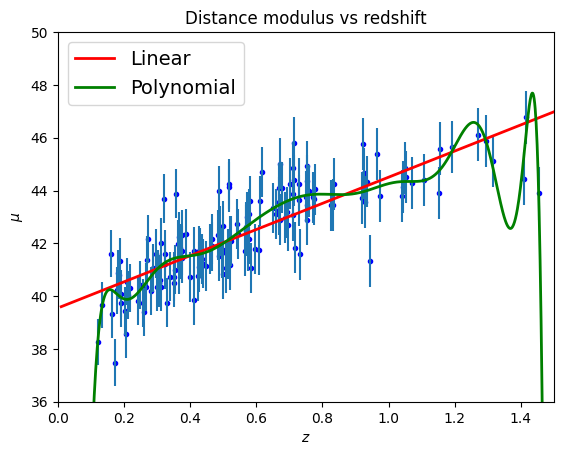

In [17]:
# YOUR CODE HERE
z_poly = poly_features.transform(z.reshape(-1, 1))
mu_pred_poly = lin_reg_poly.predict(z_poly)
plot_dist_mod()
plt.plot(z, mu_pred_lin, "r-", label="Linear", linewidth=2)
plt.plot(z, mu_pred_poly, "g-", label="Polynomial", linewidth=2)
plt.legend(loc="upper left", fontsize=14)

In [18]:
check_var_defined('mu_pred_poly')
assert mu_pred_poly.shape == (len(z),)

mu_pred_poly defined.


*Comment on the accuracy of your models.*

Linear regression model appears to fit well across the data range of z = 0.2 to 1.0. However, it fails to capture the sharp increase observed in the range $z \in [0.1, 0.2]$ and drops in range $z \in [1.0, 1.4]$. Linear regression is more likely to be underfitting and too simplistic.


On the other hand, although polynomial regression seems to capture the patterns mentioned above, it is likely to be overfitting as the prediction fluctuates greatly and try to touch all the data points in the training set.


Therefore, I believe the two models do not perform well. But in order to determine whether it is truely underfitting or overfitting, a validation set is required and RMSE has to be computed.

*Think about methods that could be used to improve the performance of your models. Improve your polynomial model and use the improved model to make predictions. Call the variable used to store the polynomial model `ridge_reg_poly`. Call the variable used to store the predictions for your polynomial model `mu_pred_poly_improved`.*

In [19]:
# YOUR CODE HERE
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

alpha = 1e-5

ridge_reg_poly = Pipeline([("poly", PolynomialFeatures(degree=degree)),
                 ("std_scalar", StandardScaler()),
                 ("lin_reg", Ridge(alpha=alpha))])

ridge_reg_poly.fit(z_sample.reshape(-1, 1), mu_sample)
mu_pred_poly_improved = ridge_reg_poly.predict(z.reshape(-1, 1))

In [20]:
check_var_defined('ridge_reg_poly')
check_var_defined('mu_pred_poly_improved')
assert mu_pred_poly_improved.shape == (len(z),), "Make sure the shape of your predictions is correct"

ridge_reg_poly defined.
mu_pred_poly_improved defined.


*Plot the predictions made with new model and all previous models considered.*

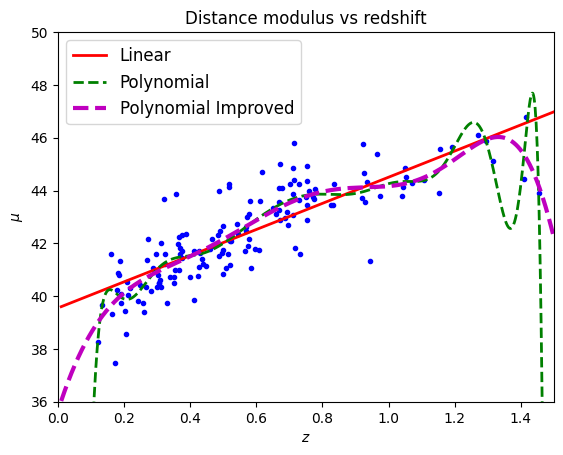

In [21]:
# YOUR CODE HERE
plt.plot(z_sample, mu_sample, "b.")
plt.plot(z, mu_pred_lin, "r-", label="Linear", linewidth=2)
plt.plot(z, mu_pred_poly, "g--", label="Polynomial", linewidth=2)
plt.plot(z, mu_pred_poly_improved, "m--", label="Polynomial Improved", linewidth=3)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.title('Distance modulus vs redshift')
plt.ylim(36, 50)
plt.xlim(0, 1.5)
plt.legend(loc="upper left", fontsize=12)

*Compute the RMS error between your predictions and the data samples.*

In [22]:
# Define a general function to compute the RMS error
def compute_rms(mu_1, mu_2):
    # YOUR CODE HERE
    result = np.sqrt(np.sum((mu_1 - mu_2) ** 2) / mu_1.shape)
    return result[0]


In [23]:
assert np.isclose(compute_rms(mu_pred_lin, mu_pred_lin), 0.0)

In [24]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_sample_lin, rms_sample_poly and rms_sample_poly_improved.
# YOUR CODE HERE
rms_sample_lin = compute_rms(mu_sample, lin_reg.predict(z_sample.reshape(-1, 1)))
rms_sample_poly = compute_rms(mu_sample, lin_reg_poly.predict(z_sample_poly))
rms_sample_poly_improved = compute_rms(mu_sample, ridge_reg_poly.predict(z_sample.reshape(-1, 1)))

In [25]:
# Print RMS values computed.
print("rms_sample_lin = {0:.4f}".format(rms_sample_lin))
print("rms_sample_poly = {0:.4f}".format(rms_sample_poly))
print("rms_sample_poly_improved = {0:.4f}".format(rms_sample_poly_improved))

rms_sample_lin = 1.0084
rms_sample_poly = 0.8855
rms_sample_poly_improved = 0.9103


In [26]:
check_var_defined('rms_sample_lin')

rms_sample_lin defined.


In [27]:
check_var_defined('rms_sample_poly')

rms_sample_poly defined.


In [28]:
check_var_defined('rms_sample_poly_improved')

rms_sample_poly_improved defined.


*Comment on what models you believe are best.*

Comparing the three RMS values, polynomial model with max degrees = 15 has the lowest and hence it has the highest accuracy for the training set. However, since those RMS values were calculated between prediction and training set, the polynomial model with higher max degrees usually has lower RMS value as it is tring to touch as many data as possible. Hence, the RMS values are not reliable. Furthermore, although `reg_poly` has the lowest RMS value, I believe it does not predict well, especialy in the region $ z \in [1.2, 1.4] $


On the other hand, although `ridge_reg_poly` has higher RMS compared to `reg_poly`, I believe the model `ridge_reg_poly` performs the best as it has not learnt "too much" from the training set and ridge regularisation term was present to punish overfitting. Also, `ridge_reg_poly` should have the lowest RMS value over validation sets.

Using our cosmological concordance model we can predict the theoretical distance modulus vs redshift relationship using our understanding of the physics.

In [29]:
from astroML.cosmology import Cosmology
cosmo = Cosmology()
mu_cosmo = np.array(list(map(cosmo.mu, z)))

        Use astropy.cosmology instead. [warnings]


*Plot the data, predictions made with all regression models, and the values predicted by the cosmological model.*

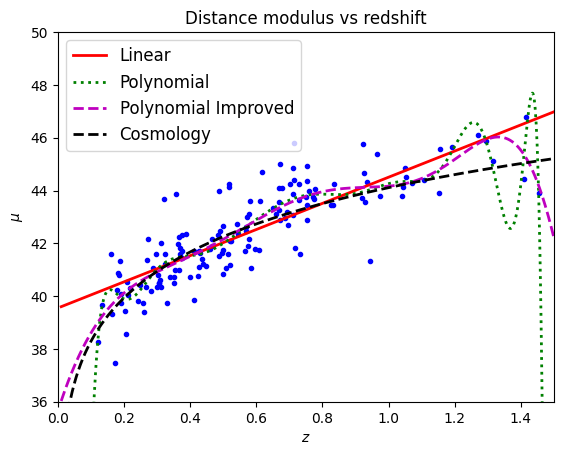

In [30]:
# YOUR CODE HERE
plt.plot(z_sample, mu_sample, "b.")
plt.plot(z, mu_pred_lin, "r-", label="Linear", linewidth=2)
plt.plot(z, mu_pred_poly, "g:", label="Polynomial", linewidth=2)
plt.plot(z, mu_pred_poly_improved, "m--", label="Polynomial Improved", linewidth=2)
plt.plot(z, mu_cosmo, "k--", label="Cosmology", linewidth=2)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.title('Distance modulus vs redshift')
plt.ylim(36, 50)
plt.xlim(0, 1.5)
plt.legend(loc="upper left", fontsize=12)

*Compute the RMS error between the predictions made by the cosmological model and each of the regression models, over the sample array `z`.*

In [31]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_cosmo_lin, rms_cosmo_poly and rms_cosmo_poly_improved.
# YOUR CODE HERE
rms_cosmo_lin = compute_rms(mu_cosmo, mu_pred_lin)
rms_cosmo_poly = compute_rms(mu_cosmo, mu_pred_poly)
rms_cosmo_poly_improved = compute_rms(mu_cosmo, mu_pred_poly_improved)

In [32]:
# Print RMS values computed.
print("rms_cosmo_lin = {0:.4f}".format(rms_cosmo_lin))
print("rms_cosmo_poly = {0:.4f}".format(rms_cosmo_poly))
print("rms_cosmo_poly_improved = {0:.4f}".format(rms_cosmo_poly_improved))

rms_cosmo_lin = 1.1252
rms_cosmo_poly = 20.6652
rms_cosmo_poly_improved = 0.6085


In [33]:
check_var_defined('rms_cosmo_lin')

rms_cosmo_lin defined.


In [34]:
check_var_defined('rms_cosmo_poly')

rms_cosmo_poly defined.


In [35]:
check_var_defined('rms_cosmo_poly_improved')

rms_cosmo_poly_improved defined.


*Comment on the RMS values computed and the implications for the accuracy of the different regression models considered.*

Given that the size of the validation set is around 1000 which is sufficiently large, the RMS values calculated over this validation set can be used as a reliable metric for assessing model accuracy.


`ridge_reg_poly` has the lowest RMS value, which implies that its prediction is the best over the three models. An RMS value of 0.6 is relatively small when compared to the average value of the data $\mu$, which suggests the model achieves a high level of accuracy. Therefore, it is the most effective model among the three.


`lin_reg` has the second lowest RMS value and the RMS value is relatively small compared to the average value of the data $\mu$, demonstrating linear regression also fits well. However, it cannot capture the data pattern at the two ends, leading to worse accuracy than `ridge_reg_poly`. Overall, `lin_reg` is still a good prediction model.


`lin_reg_poly` has a RMS value of around 20, which is approximately 50% of the average magnitue of $\mu$, meaning this model has low accuracy and should be improved. However, the large RMS error should be caused by the region where $z \in [1.2, 1.4]$ and $z \in [0.0, 0.2]$, as the model has high variance in these regions. However, I believe its prediction for $z \in [0.2, 1.2]$ still has high accuracy.

---

## Part 2: Classification

In these exercises we will consider classification of [RR Lyrae](https://en.wikipedia.org/wiki/RR_Lyrae_variable) variable stars.  RR Lyrae variables are often used as standard candles to measure astronomical distances since their period of pulsation can be related to their absolute magnitude.

Observations of star magnitudes are made in each [SDSS filter band](http://skyserver.sdss.org/dr2/en/proj/advanced/color/sdssfilters.asp): u, g, r, i, z.

We will consider the space of astronomical "colours" to distinguish RR Lyraes from background stars.  Astronomical colours are simply differences in magnitudes between bands, e.g. u-g, g-r, r-i, i-z.  You can find further background [here](https://en.wikipedia.org/wiki/Color%E2%80%93color_diagram).

First, download the data.  (This may take some time on first execution.  Subsequently executions will read from cached data on your system.)

In [36]:
# Load data
from astroML.datasets import fetch_rrlyrae_combined
X, y = fetch_rrlyrae_combined()

You can learn more about the format of the returned data [here](http://www.astroml.org/modules/generated/astroML.datasets.fetch_rrlyrae_combined.html).  In particular, note that the columns of `X` are u-g, g-r, r-i, i-z.

*Construct a Pandas DataFrame for the `X` data and a Series for the `y` data.  Call your Pandas objects `X_pd` and `y_pd` respectively.*

Be sure to give your colums the correct colour name, e.g. 'u-g'.

In [37]:
import pandas as pd
cols=['u-g', 'g-r', 'r-i', 'i-z']
# YOUR CODE HERE
X_pd = pd.DataFrame(data=X, columns=cols)

In [38]:
check_var_defined('X_pd')
print(X_pd)

X_pd defined.
            u-g       g-r       r-i       i-z
0      1.250999  0.394000  0.137000  0.061999
1      1.048000  0.339001  0.151999  0.023001
2      1.008001  0.341999  0.129000  0.203001
3      0.965000  0.392000  0.149000  0.150000
4      1.040001  0.333000  0.125999  0.101999
...         ...       ...       ...       ...
93136  0.962999  0.059000 -0.025999 -0.025000
93137  1.059999  0.185001  0.050999 -0.023998
93138  1.044001  0.212000  0.035000  0.002001
93139  1.064999  0.172001  0.042000  0.003000
93140  1.125999  0.065001 -0.017000 -0.057999

[93141 rows x 4 columns]


In [39]:
# YOUR CODE HERE
y_pd = pd.Series(data=y)

In [40]:
check_var_defined('y_pd')
print(y_pd)

y_pd defined.
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
93136    1.0
93137    1.0
93138    1.0
93139    1.0
93140    1.0
Length: 93141, dtype: float64


*Combine your data and targets into a single Pandas DataFrame, labelling the target column 'target'.  Call the resulting Pandas DataFrame `X_pd_all`.*

In [41]:
# YOUR CODE HERE
X_pd_all = pd.concat([X_pd, y_pd], axis=1).rename(columns={0: "target"})

In [42]:
check_var_defined('X_pd_all')
print(X_pd_all)

X_pd_all defined.
            u-g       g-r       r-i       i-z  target
0      1.250999  0.394000  0.137000  0.061999     0.0
1      1.048000  0.339001  0.151999  0.023001     0.0
2      1.008001  0.341999  0.129000  0.203001     0.0
3      0.965000  0.392000  0.149000  0.150000     0.0
4      1.040001  0.333000  0.125999  0.101999     0.0
...         ...       ...       ...       ...     ...
93136  0.962999  0.059000 -0.025999 -0.025000     1.0
93137  1.059999  0.185001  0.050999 -0.023998     1.0
93138  1.044001  0.212000  0.035000  0.002001     1.0
93139  1.064999  0.172001  0.042000  0.003000     1.0
93140  1.125999  0.065001 -0.017000 -0.057999     1.0

[93141 rows x 5 columns]


*Add a 'target description' column to your existing `X_pd_all` DataFrame, with fields 'Background' and 'RR Lyrae' to specify the target type.*

In [43]:
# YOUR CODE HERE
X_pd_all['target description'] = np.where(X_pd_all["target"] == 1, "RR Lyrae", "Background")

In [44]:
print(X_pd_all)

            u-g       g-r       r-i       i-z  target target description
0      1.250999  0.394000  0.137000  0.061999     0.0         Background
1      1.048000  0.339001  0.151999  0.023001     0.0         Background
2      1.008001  0.341999  0.129000  0.203001     0.0         Background
3      0.965000  0.392000  0.149000  0.150000     0.0         Background
4      1.040001  0.333000  0.125999  0.101999     0.0         Background
...         ...       ...       ...       ...     ...                ...
93136  0.962999  0.059000 -0.025999 -0.025000     1.0           RR Lyrae
93137  1.059999  0.185001  0.050999 -0.023998     1.0           RR Lyrae
93138  1.044001  0.212000  0.035000  0.002001     1.0           RR Lyrae
93139  1.064999  0.172001  0.042000  0.003000     1.0           RR Lyrae
93140  1.125999  0.065001 -0.017000 -0.057999     1.0           RR Lyrae

[93141 rows x 6 columns]


*How many RR Lyrae variable stars are there in the dataset (i.e compute `n_rrlyrae`)?*

In [45]:
# YOUR CODE HERE
n_rrlyrae = int(np.sum(X_pd_all["target"]))


In [46]:
check_var_defined('n_rrlyrae')
print("n_rrlyrae = {0}".format(n_rrlyrae))

n_rrlyrae defined.
n_rrlyrae = 483


*How many background stars are there in the dataset (i.e. compute `n_background`)?*

In [47]:
# YOUR CODE HERE
n_background = X_pd_all[X_pd_all["target"] == 0].shape[0]

In [48]:
check_var_defined('n_background')
print("n_background = {0}".format(n_background))

n_background defined.
n_background = 92658


*Plot scatter plot pairs for all colour combinations using `seaborn`.  Colour the points by target type. Make sure the distribution plots are normalised to have an area of 1 under the curve for each of the classes.*

In [49]:
%matplotlib inline
import seaborn as sns; sns.set()

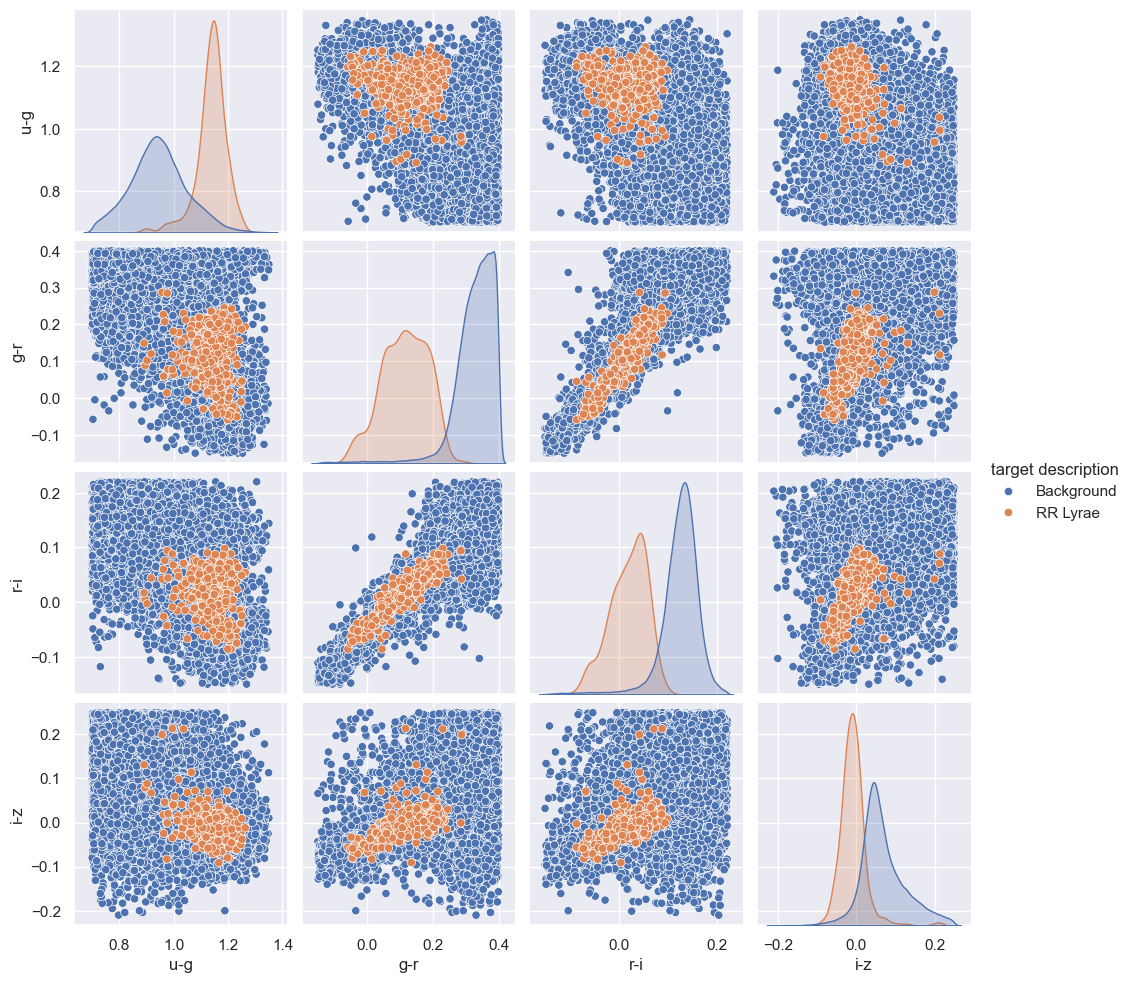

In [50]:
# YOUR CODE HERE
sns.pairplot(X_pd_all.drop(["target"], axis=1), hue='target description', diag_kws=dict(common_norm=False))

Let's separate the data into training and test sets, keeping 25% of the data for testing.  

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

First let's consider 1D classification for the zeroth colour, i.e. $u-g$. 

In [52]:
ind = 0
col=cols[ind]
col

'u-g'

In [53]:
X_train_1d = X_train[:, ind]
X_train_1d = X_train_1d.reshape(-1,1)
X_test_1d = X_test[:, ind]
X_test_1d = X_test_1d.reshape(-1,1)

To get some further intuition about the 1D classiciation problem consider a 1D plot of
class against colour.

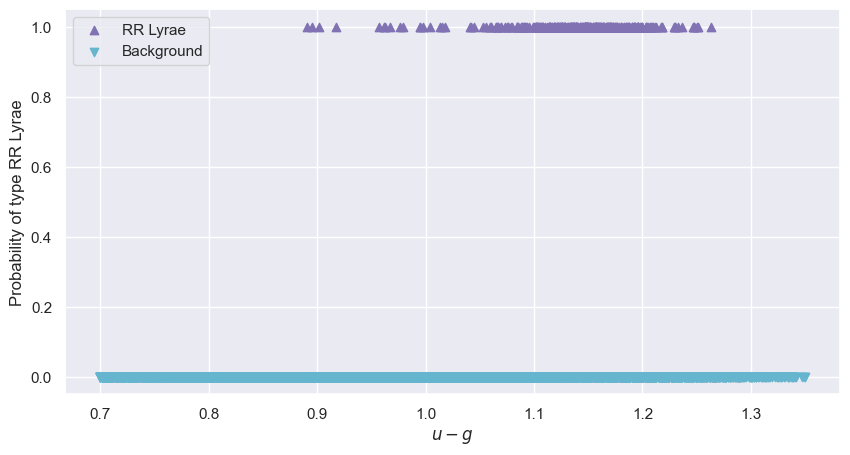

In [54]:
def plot_scatter():
    plt.figure(figsize=(10,5))
    plt.scatter(X_train_1d[y_train==1], y_train[y_train==1], c='m', marker='^', label='RR Lyrae')
    plt.scatter(X_train_1d[y_train==0], y_train[y_train==0], c='c', marker='v', label='Background')
    plt.xlabel('$' + col + '$')
    plt.ylabel('Probability of type RR Lyrae')
plot_scatter()    
plt.legend()

*Given the plot shown above, comment on how well you expect logistic regression to perform.*

In an ideal scenario for logistic regression, the two classes of data would be distinctly separable, with one class mainly located on one side (left or right) and other class on the opposite side.
However, the observed u-g values of background stars spread along the entire observed u-g values, and meanwhile u-g values of RR Lyrae stars concentrated within the range of background stars. Logistic regression should perform badly in this case, due to the overlapping.

*Where would you guess the decision bounary should lie?  Set the variable `decision_boundary_guess` to your guess.*

In [55]:
# YOUR CODE HERE
decision_boundary_guess = 1.1

In [56]:
check_var_defined('decision_boundary_guess')
print("decision_boundary_guess = {0:.4f}".format(decision_boundary_guess))

decision_boundary_guess defined.
decision_boundary_guess = 1.1000


Use Scikit-Learn to perform logistic regression to classify the two classes for this 1D problem.

First, set the inverse regularation strength `C` such that regularisation is effecitvely not performed.

In [57]:
C = 1e10

*Second, fit the model using Scikit-Learn. Use the variable `clf` for your classification model.*

In [58]:
from sklearn.linear_model import LogisticRegression
# YOUR CODE HERE
clf = LogisticRegression(C=C).fit(X_train_1d, y_train)

In [59]:
check_var_defined('clf')

clf defined.


*Compute the decision boundary of the logistic regression model fitted by Scikit-Learn.  User variable `decision_boundary_sklearn` for your result.*

(Ensure your result is a scalar and not an array of length 1.)

In [60]:
# YOUR CODE HERE
X_1d_new = np.linspace(min(X_train_1d), max(X_train_1d)+1, 1000).reshape(-1, 1)
y_1d_proba = clf.predict_proba(X_1d_new)
decision_boundary_sklearn = X_1d_new[y_1d_proba[:, 1] >= 0.5][0][0]

In [61]:
assert not hasattr(decision_boundary_sklearn, "__len__")
print("decision_boundary_sklearn = {0:.4f}".format(decision_boundary_sklearn))

decision_boundary_sklearn = 1.3722


*Evaluate the probabilities predicted by your logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba` for your computed probabilities.*

In [62]:
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
# YOUR CODE HERE
y_1d_proba = clf.predict_proba(X_1d_new)

In [63]:
check_var_defined('y_1d_proba')

y_1d_proba defined.


*Plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously and the one computed by Scikit-Learn.*

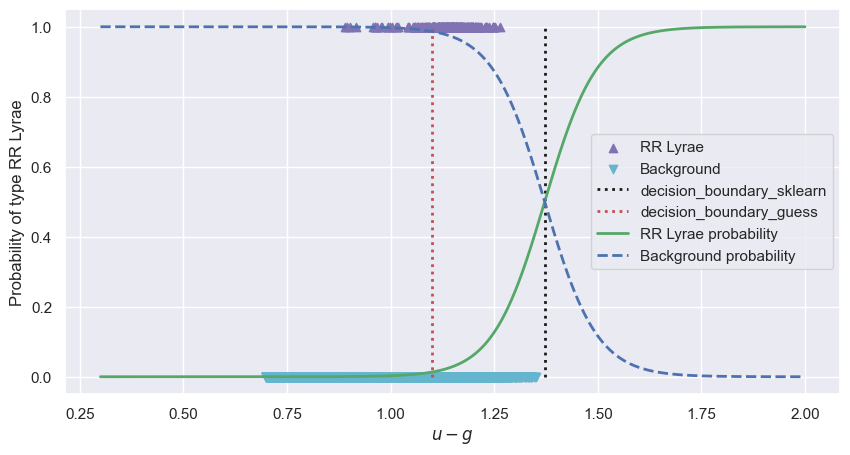

In [64]:
plot_scatter()
# YOUR CODE HERE  
plt.plot([decision_boundary_sklearn, decision_boundary_sklearn], [0, 1], "k:", linewidth=2, label="decision_boundary_sklearn")
plt.plot([decision_boundary_guess, decision_boundary_guess], [0, 1], "r:", linewidth=2, label="decision_boundary_guess")
plt.plot(X_1d_new, y_1d_proba[:, 1], "g-", linewidth=2, label="RR Lyrae probability")
plt.plot(X_1d_new, y_1d_proba[:, 0], "b--", linewidth=2, label="Background probability")
plt.legend()

*From inspection of your plot, how would all objects in the training set be classified?*

All objects are classified as background stars

*Use your logistic regression model fitted by Scikit-Learn to predict the class of all objects in the test set. Use variable `y_test_1d_pred` to specify your answer.*

In [65]:
# YOUR CODE HERE
y_test_1d_pred = clf.predict(X_test_1d)

In [66]:
check_var_defined('y_test_1d_pred')

y_test_1d_pred defined.


*How many objects are classified as of type RR Lyrae?  Use variable `n_rrlyrae_pred` to specify your answer.*

In [67]:
# YOUR CODE HERE
n_rrlyrae_pred = y_test_1d_pred[y_test_1d_pred == 1].size

In [68]:
check_var_defined('n_rrlyrae_pred')
assert n_rrlyrae_pred % 1 == 0 # check integer
print("n_rrlyrae_pred = {0}".format(n_rrlyrae_pred))

n_rrlyrae_pred defined.
n_rrlyrae_pred = 0


*How many objects are classified as of type Background?  Use variable `n_background_pred` to specify your answer.*

In [69]:
# YOUR CODE HERE
n_background_pred = y_test_1d_pred[y_test_1d_pred == 0].size

In [70]:
check_var_defined('n_background_pred')
assert n_background_pred % 1 == 0 # check integer
print("n_background_pred = {0}".format(n_background_pred))

n_background_pred defined.
n_background_pred = 23286


Let's check the Scikit-Learn result by solving the logistic regression problem (without regularisation) manually.

Recall that the cost function for logistic regression is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right],
$$


where

$$\hat{p} = \sigma(\theta^\text{T} x) = \frac{1}{1+\exp{(-\theta^\text{T} x)}}. $$

Show analytically that the derivative of the cost function is given by
$$
\frac{\partial C}{\partial \theta} =
\frac{1}{m} \sum_{i=1}^m 
\left[ \sigma\left(\theta^{\rm T} x^{(i)} \right) - y^{(i)} \right]
x^{(i)}
$$
$$
=
\frac{1}{m} 
X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right]
$$

(use latex mathematics expressions).

*First, simplify the cost function terms $\log(\hat{p})$ and $\log(1-\hat{p})$ to express in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.*

(You may drop $i$ superscripts for notational brevity.)

\begin{array}{cc}


\log(\hat{p}) = \log(\frac{1}{1+\exp{(-\theta^\text{T} x)}}) & \log(1-\hat{p}) = \log(1-\frac{1}{1+\exp{(-\theta^\text{T} x)}})\\ \\
\log(\hat{p}) = \log([1+\exp{(-\theta^\text{T} x)}]^{-1}) & \log(1-\hat{p}) = \log(\frac{\exp{(-\theta^\text{T} x)}}{1+\exp{(-\theta^\text{T} x)}}) \\ \\
\log(\hat{p}) = -\log(1+e^{-\theta^\text{T} x}) & \log(1-\hat{p}) = \log(e^{-\theta^\text{T} x})-\log(1+e^{-\theta^\text{T} x}) \\ \\
 & \log(1-\hat{p}) = -\theta^\text{T} x-\log(1+e^{-\theta^\text{T} x})

\end{array}

*Next, substitute these terms into the cost function and simplify to also express the cost function in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.*

$$
C(\theta) = 
-\frac{1}{m} \sum_{i=1}^m 
\left [ 
y (-\log(1+e^{-\theta^\text{T} x}))
+
(1 - y) (-\theta^\text{T} x-\log(1+e^{-\theta^\text{T} x}))
\right]
$$

$$
C(\theta) = 
-\frac{1}{m} \sum_{i=1}^m 
\left [ 
-y\log(1+e^{-\theta^\text{T} x})
-\theta^\text{T} x
-\log(1+e^{-\theta^\text{T} x})
+y\theta^\text{T} x
+y\log(1+e^{-\theta^\text{T} x})
\right]
$$

$$
C(\theta) = 
-\frac{1}{m} \sum_{i=1}^m 
\left [ 
-\theta^\text{T} x
-\log(1+e^{-\theta^\text{T} x})
+y\theta^\text{T} x
\right]
$$

*Now compute the derivative of the cost function with respect to variable $\theta_j$, i.e. compute $\partial C / \partial \theta_j$.*

$$
\frac{\partial C}{\partial \theta _j}
=
-\frac{1}{m} \sum_{i=1}^m (-x + xy + \frac{xe^{-\theta _j x}}{1 + e^{-\theta _j x}})
$$

$$
\frac{\partial C}{\partial \theta _j}
=
-\frac{1}{m} \sum_{i=1}^m (xy + \frac{xe^{-\theta _j x} -x -xe^{-\theta _j x}}{1 + e^{-\theta _j x}})
$$

$$
\frac{\partial C}{\partial \theta _j}
=
-\frac{1}{m} \sum_{i=1}^m (xy - \frac{x}{1 + e^{-\theta _j x}})
$$

*Combine terms for all $\theta_j$ to give the overall derivative with respect to $\theta$, i.e. $\partial C / \partial \theta$.*

$$
\frac{\partial C}{\partial \theta}
=
-\frac{1}{m} (X^{\text{T}}y - \frac{X}{1 + e^{-\theta^\text{T} X}})
$$

$$
\frac{\partial C}{\partial \theta}
=
\frac{1}{m} X^{\text{T}} [\frac{1}{1 + e^{-\theta^\text{T} X}} - y]
$$

Using the analytically expression for the derivative of the cost function, we will solve the logistic regression problem by implementing a gradient descent algorithm.

*First, define the sigmoid function.*

In [71]:
def sigmoid(x):
    # YOUR CODE HERE
    return 1 / (1 + np.exp(-x))

In [72]:
assert np.isclose(sigmoid(0), 0.5)

*Next, extend the training data to account for a bias term in your model. Use variable `X_train_1d_b` to specify your result.*

In [73]:
# YOUR CODE HERE
X_train_1d_b = np.c_[np.ones(X_train_1d.shape[0]), X_train_1d]

In [74]:
check_var_defined('X_train_1d_b')

X_train_1d_b defined.


*Implement batch gradient descent to fit the parameters of your logistic regression model.  Consider `n_iterations = 4000` iterations and a learning rate of `alpha = 100.0`. Consider a starting point of $\theta_0 = (1, 1)$, i.e. `theta = np.array([[1], [1]])`. Use variable `theta` to specify your estimated parameters.*

*(Make sure your implementation is reasonably efficient. If it takes longer than 2 minutes to execute when running on our server it may not complete and you will not be awarded grades. The solution answer runs in under 10 seconds.)*

In [75]:
n_iterations = 4000
alpha = 100.0
theta = np.array([[1], [1]])

# YOUR CODE HERE
m = y_train.shape[0]
for i in range(n_iterations):
    theta = theta - alpha * 1/m*(X_train_1d_b.T.dot(sigmoid(X_train_1d_b.dot(theta)) - y_train.reshape(-1, 1)))

In [76]:
check_var_defined('theta')
print("theta[0] = {0:.4f}".format(theta[0][0]))
print("theta[1] = {0:.4f}".format(theta[1][0]))

theta defined.
theta[0] = -21.7012
theta[1] = 15.8177


*Compute the difference between the logistic regression model intercept computed by Scikit-Learn and manually.  Use variable `intercept_diff` for your result.*

In [77]:
# YOUR CODE HERE
intercept_diff = clf.intercept_[0] - theta[0][0]

In [78]:
check_var_defined('intercept_diff')
print("intercept_diff = {0:.4E}".format(intercept_diff))

intercept_diff defined.
intercept_diff = -1.0314E-03


*Compute the difference between the logistic regression model* slope *(i.e. coefficient) computed by Scikit-Learn and manually.  Use variable `coeff_diff` for your result.*

In [79]:
# YOUR CODE HERE
coeff_diff = clf.coef_[0][0] - theta[1][0]

In [80]:
check_var_defined('coeff_diff')
print("coeff_diff = {0:.4E}".format(coeff_diff))

coeff_diff defined.
coeff_diff = 9.0958E-04


You should find that the solution from your gradient descent algorithm is close (although not identical) to that recovered by Scikit-Learn. 

Both fitted logistic regression models, however, are not effective. The reason for this is because of class imbalance.  *Describe the class imbalance problem in your own words and how it manifests itself in the classification problem at hand.*

Class imbalance occurs when the training dataset has uneven distribution of classes, i.e. majority of data sample are class 1 and only few are class 2 in binary classification problem. Class imbalance leads to a biased model which tends to classify incoming data to be the larger class (background star).


Class imbalance can be noticed when 1) decision boundary is NOT placed between samples of the two classes, but placed near one end of the majority class data sample, heavily favoring the majority class; 2) There are no or extremely less data sample are classified as a specific class (RR Lyrae in this case).

The class imbalance problem can be addressed by weighting the training data in a manner that is inversely proportional to their frequency.

*Repeat the fitting of your linear regression model but this time perform class weighting.  Use variable `clf_balanced` for your new model.*

See the `class_weight` argument of the Scikit-Learn [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier for further details on how to perform class weighting.

In [81]:
from sklearn.linear_model import LogisticRegression
# YOUR CODE HERE
clf_balanced = LogisticRegression(class_weight='balanced').fit(X_train_1d, y_train)

In [82]:
check_var_defined('clf_balanced')

clf_balanced defined.


*Compute the decision boundary of the logistic regression model fitted by Scikit-Learn when weighting classes.* 

(Ensure your result is a scalar and not an array of length 1.)

In [83]:
# YOUR CODE HERE
y_1d_proba = clf_balanced.predict_proba(X_1d_new)
decision_boundary_sklearn_balanced = X_1d_new[y_1d_proba[:, 1] >= 0.5][0][0]

In [84]:
check_var_defined('decision_boundary_sklearn_balanced')
assert not hasattr(decision_boundary_sklearn_balanced, "__len__")
print("decision_boundary_sklearn_balanced = {0:.4f}".format(decision_boundary_sklearn_balanced))

decision_boundary_sklearn_balanced defined.
decision_boundary_sklearn_balanced = 1.0607


*Evaluate the probabilities prediced by your new logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba_balanced` for your computed probabilities.*

In [85]:
# YOUR CODE HERE
y_1d_proba_balanced = clf_balanced.predict_proba(X_1d_new)

In [86]:
check_var_defined('y_1d_proba_balanced')

y_1d_proba_balanced defined.


*For your new balanced model, plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously, the one computed by Scikit-Learn initially, and the one computed by Scikit-Learn for your new balanced model.*

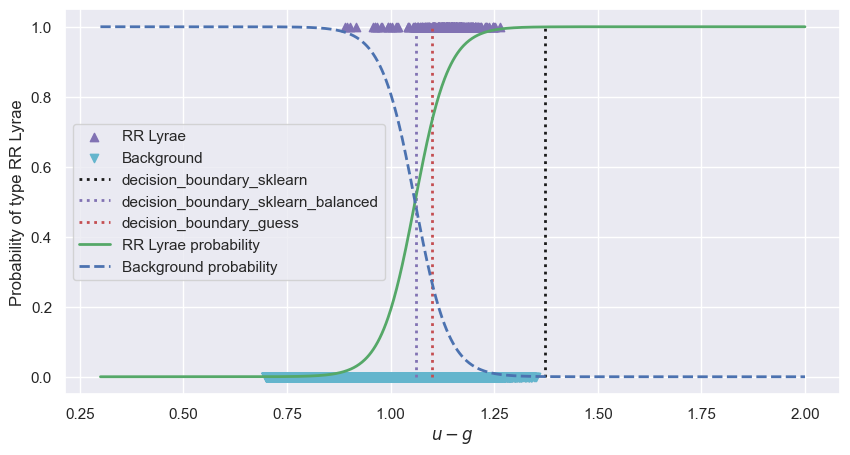

In [87]:
plot_scatter()
# YOUR CODE HERE
plt.plot([decision_boundary_sklearn, decision_boundary_sklearn], [0, 1], "k:", linewidth=2, label="decision_boundary_sklearn")
plt.plot([decision_boundary_sklearn_balanced, decision_boundary_sklearn_balanced], [0, 1], "m:", linewidth=2, label="decision_boundary_sklearn_balanced")
plt.plot([decision_boundary_guess, decision_boundary_guess], [0, 1], "r:", linewidth=2, label="decision_boundary_guess")
plt.plot(X_1d_new, y_1d_proba_balanced[:, 1], "g-", linewidth=2, label="RR Lyrae probability")
plt.plot(X_1d_new, y_1d_proba_balanced[:, 0], "b--", linewidth=2, label="Background probability")
plt.legend()

*Comment on the decision boundary of the balanced model compared to the unbalanced models fitted previously.*

The decision boundary of the balanced model works better than the previously unbalanced model since it can identify some RR Lyrae stars by sacrificing precision for recall. I believe the model is now having a more favorable precision-recall tradeoff.

Now that we've built up good intuition surrounding the subtleties of the classification problem at hand in 1D, let's consider the 2D problem (we will keep to 2D for plotting convenience).

For the 2D case we consider the following colours.

In [88]:
ind = 1
cols[:ind+1]

['u-g', 'g-r']

Consider the following training and test data for the 2D problem.

In [89]:
X_train_2d = X_train[:, :ind+1]
X_train_2d = X_train_2d.reshape(-1,ind+1)
X_test_2d = X_test[:, :ind+1]
X_test_2d = X_test_2d.reshape(-1,ind+1)

*Train a logistic regression model for this 2D problem.  Use variable `clf_2d_logistic` for your classifier.*

In [90]:
# YOUR CODE HERE
clf_2d_logistic = LogisticRegression(class_weight='balanced').fit(X_train_2d, y_train)

In [91]:
check_var_defined('clf_2d_logistic')

clf_2d_logistic defined.


*Compute the precision and recall of your 2D logistic regression model. Use variables `precision_logistic` and `recall_logistic` for your results.*

In [92]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
y_test_2d_pred = clf_2d_logistic.predict(X_test_2d)
conf_matrix = confusion_matrix(y_test, y_test_2d_pred)

TN, FP, FN, TP = conf_matrix[0,0], conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]
# print(TN, FP, FN, TP)
precision_logistic = TP / (TP + FP)
recall_logistic = TP / (TP + FN)

In [93]:
check_var_defined('precision_logistic')
print("precision_logistic = {0:.6f}".format(precision_logistic))

precision_logistic defined.
precision_logistic = 0.136808


In [94]:
check_var_defined('recall_logistic')
print("recall_logistic = {0:.6f}".format(recall_logistic))

recall_logistic defined.
recall_logistic = 0.992126


Consider the following meshgrid defining the u-g and g-r colour domain of interest.

In [95]:
xlim = (0.7, 1.45)  # u-g
ylim = (-0.15, 0.4) # g-r
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

*Over the domain specified above plot the predicted classification probability.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.*

(0.7, 1.45, -0.15, 0.4)

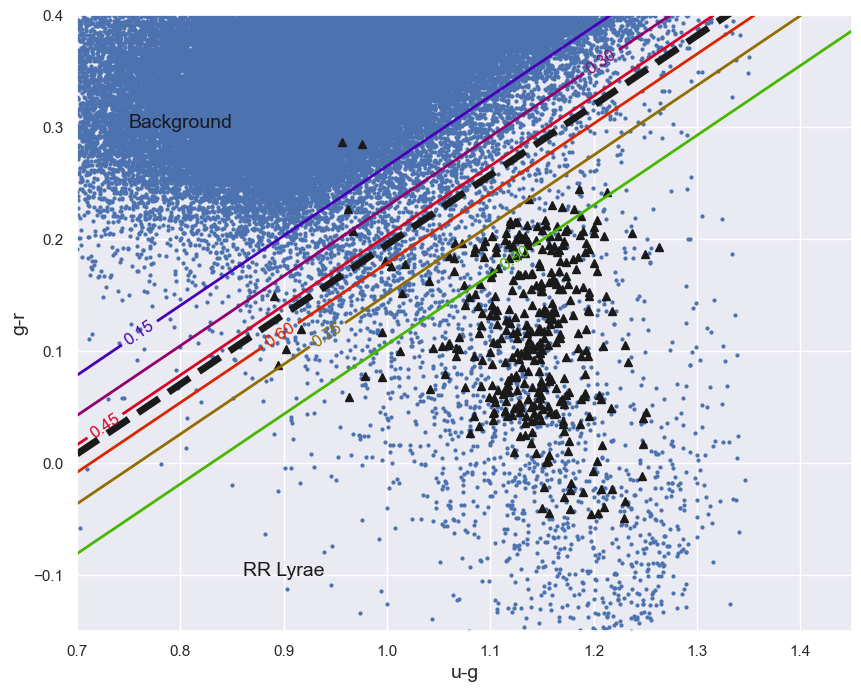

In [96]:
# YOUR CODE HERE
plt.figure(figsize=(10, 8))

plt.plot(X_train_2d[y_train==0, 0], X_train_2d[y_train==0, 1], "b.", markersize=4, label="background")
plt.plot(X_train_2d[y_train==1, 0], X_train_2d[y_train==1, 1], "k^", markersize=6, label="RR Lyrae")

X_new = np.c_[xx.ravel(), yy.ravel()]

y_proba = clf_2d_logistic.predict_proba(X_new)

zz = y_proba[:, 1].reshape(xx.shape)
contour = plt.contour(xx, yy, zz, cmap=plt.cm.brg, linewidths=2)

# Solve theta^T x = 0 to determine the boundary, as in the lecture
left_right = np.array(xlim) 
boundary = -(clf_2d_logistic.coef_[0][0] * left_right + clf_2d_logistic.intercept_[0]) / clf_2d_logistic.coef_[0][1]

plt.clabel(contour, inline=True, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=5)
plt.text(0.9, -0.1, "RR Lyrae", fontsize=14, color="k", ha="center")
plt.text(0.8, 0.3, "Background", fontsize=14, color="k", ha="center")
plt.xlabel("u-g", fontsize=14)
plt.ylabel("g-r", fontsize=14)
plt.axis([xlim[0], xlim[1], ylim[0], ylim[1]])

# plt.legend()

*Now train an SVM classifier that can support a non-linear decision boundary on the same problem. Use the variable `clf_2d_svm` for your model.*

In [97]:
# YOUR CODE HERE
from sklearn.svm import SVC

gamma='scale'
C=10

clf_2d_svm = Pipeline([("std_scalar", StandardScaler()),
                       ("clf_2d_svm", SVC(kernel="rbf", gamma=gamma, C=C, class_weight="balanced"))])
clf_2d_svm.fit(X_train_2d, y_train)

Pipeline(steps=[('std_scalar', StandardScaler()),
                ('clf_2d_svm', SVC(C=10, class_weight='balanced'))])

In [98]:
check_var_defined('clf_2d_svm')

clf_2d_svm defined.


*Replicate for the SVM your plot above for the 2D logistic regression model.  Over the domain specified above plot the decision function score.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.*

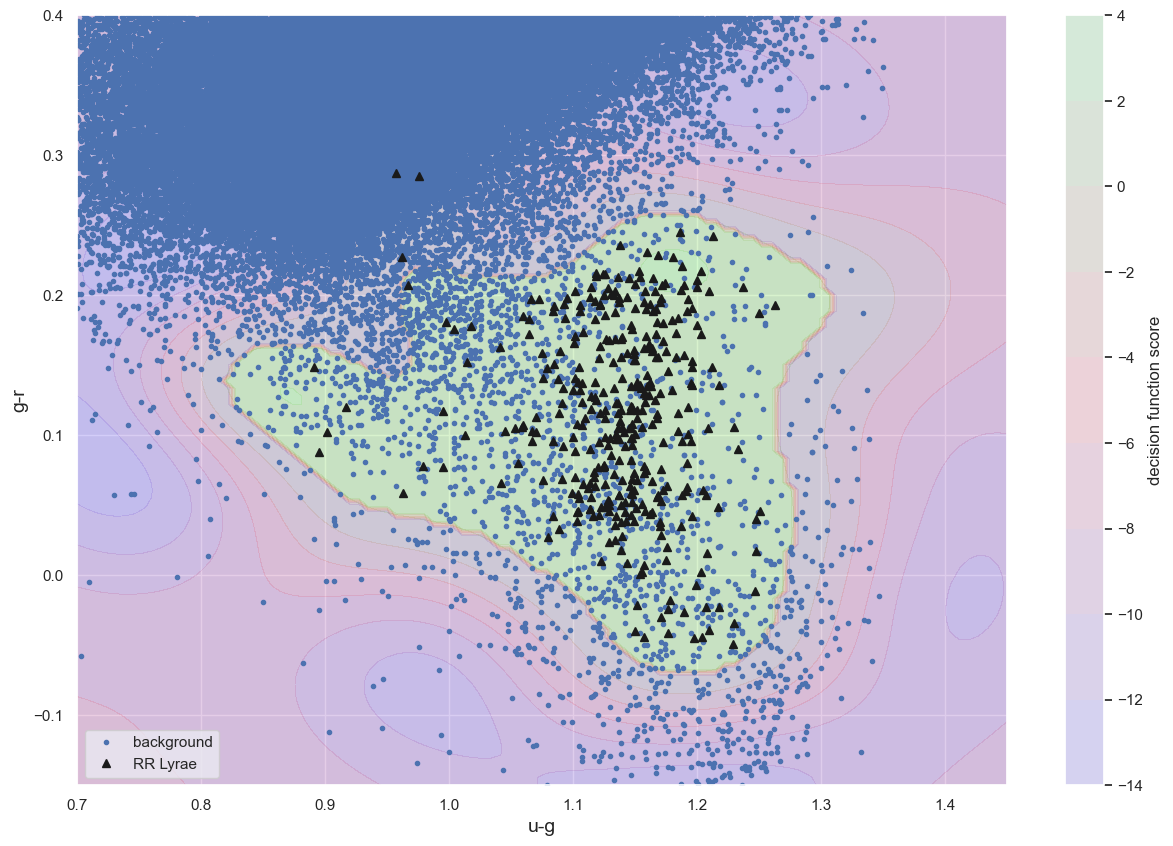

In [99]:
# YOUR CODE HERE
plt.figure(figsize=(15, 10))

plt.plot(X_train_2d[y_train==0, 0], X_train_2d[y_train==0, 1], "b.", markersize=6, label="background")
plt.plot(X_train_2d[y_train==1, 0], X_train_2d[y_train==1, 1], "k^", markersize=6, label="RR Lyrae")

x0s = np.linspace(xlim[0], xlim[1], 100)
x1s = np.linspace(ylim[0], ylim[1], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X_2d_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = clf_2d_svm.predict(X_2d_new).reshape(x0.shape)
y_decision = clf_2d_svm.decision_function(X_2d_new).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.1)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.colorbar(label='decision function score')
plt.xlabel("u-g", fontsize=14)
plt.ylabel("g-r", fontsize=14)

plt.legend()



*Compute the precision and recall of your 2D SVM model. Use variables `precision_svm` and `recall_svm` for your results.*

In [100]:
# YOUR CODE HERE
y_test_2d_pred = clf_2d_svm.predict(X_test_2d)
conf_matrix = confusion_matrix(y_test, y_test_2d_pred)

TN, FP, FN, TP = conf_matrix[0,0], conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]
# print(TN, FP, FN, TP)
precision_svm = TP / (TP + FP)
recall_svm = TP / (TP + FN)

In [101]:
check_var_defined('precision_svm')
print("precision_svm = {0:.6f}".format(precision_svm))

precision_svm defined.
precision_svm = 0.172269


In [102]:
check_var_defined('recall_svm')
print("recall_svm = {0:.6f}".format(recall_svm))

recall_svm defined.
recall_svm = 0.968504


*Comment on the difference in decision boundary between your logistic regression and SVM models and how this impacts the effectiveness of the models.*

The decision boundary in logistic regression is a linear line while SVM encloses an area for RR Lyrae stars. Since it is obvious that majority of RR Lyrae stars concentrate in the region where $ u-g \in [0.9, 1.3]$ and $g-r \in [-0.1, 0.2]$ only, SVM fits well as it tries to enclose an area mentioned. On the other hand, logistic regression can only provide a simple linear boundary, any data in the bottom right side is classified as RR Lyrae, which does not match the pattern (the enclosed area) and hence it has worse performance compared to SVM.